# &#x1F4D1; &nbsp;  The Data Set of Flower Images

## &#x1F310; &nbsp; 0. Code Library, Style and Links

[Keras](https://keras.rstudio.com/)

[Training Visualization](https://cran.r-project.org/web/packages/keras/vignettes/training_visualization.html)

[Getting started with imager](https://dahtah.github.io/imager/gettingstarted.html)

In [2]:
library(IRdisplay)
library(repr)
library(tensorflow)
library(keras)
library(imager)

In [3]:
display_html("<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto');
body {background-color: gainsboro;} 
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #37c9e1; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #ccc;} 
h2, h3 {color: slategray; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #ccc;}
h4 {color: #818286; font-family: 'Roboto';}
span {text-shadow: 4px 4px 4px #ccc;}
div.output_prompt, div.output_area pre {color: slategray;}
div.input_prompt, div.output_subarea {color: #37c9e1;}      
div.output_stderr pre {background-color: gainsboro;}  
div.output_stderr {background-color: slategrey;}     
</style>")

## &#x1F310; &nbsp; 1. Explore the Data

In [3]:
flowers <- read.csv("/Users/olgabelitskaya/cookbooks/flower_images/flower_labels.csv")
head(flowers)

file,label
0001.png,0
0002.png,0
0003.png,2
0004.png,0
0005.png,0
0006.png,1


In [4]:
flower_targets <- as.matrix(flowers["label"])
flower_targets <- keras::to_categorical(flower_targets, 10)
head(flower_targets)

1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0


In [5]:
image_paths <- list.files("/Users/olgabelitskaya/cookbooks/flower_images", 
                          recursive = TRUE, full.names = TRUE)
image_paths <- image_paths[1:(length(image_paths)-1)]
image_paths[1:3]

[1] "/Users/olgabelitskaya/cookbooks/flower_images/0001.png"
[2] "/Users/olgabelitskaya/cookbooks/flower_images/0002.png"
[3] "/Users/olgabelitskaya/cookbooks/flower_images/0003.png"

In [6]:
img_path <- "/Users/olgabelitskaya/cookbooks/flower_images/0001.png"
img <- keras::image_load(img_path, target_size=c(128,128))
img <- image_to_array(img) / 255
img <- array_reshape(img, c(1,128,128,3))
dim(img)

[1]   1 128 128   3

[1] 128 128

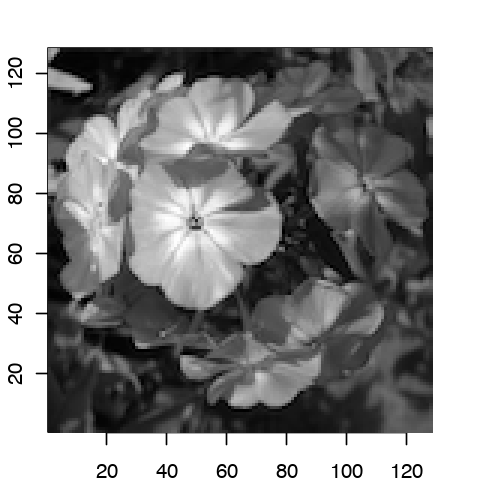

In [7]:
gr_img <- array_reshape(grayscale(img), c(128,128))
options(repr.plot.width=4,repr.plot.height=4)
par(mar=c(2,2,2,2))
dim(gr_img)
image(c(1:128),c(1:128),gr_img,col=grey(seq(0,1,length=256)))

[1] 128 128   1   4

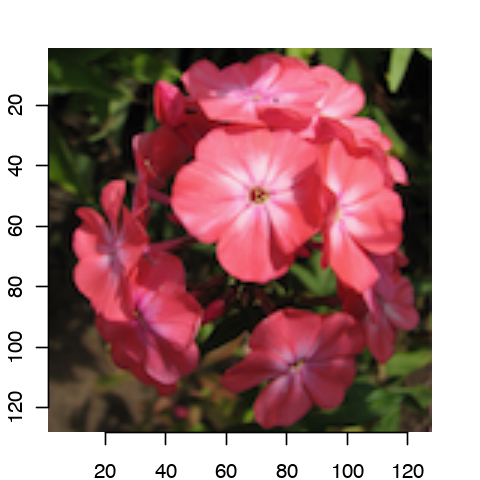

In [8]:
# 'imager'
im <- load.image(img_path)
options(repr.plot.width=4,repr.plot.height=4)
par(mar=c(2,2,2,2))
dim(im)
plot(im)

In [9]:
image_loading <- function(image_path) {
    image <- keras::image_load(image_path, target_size=c(128,128))
    image <- image_to_array(image) / 255
    image <- array_reshape(image, c(1, dim(image)))
    return(image)
}

In [10]:
flower_tensors <- lapply(image_paths, image_loading)
flower_tensors <- array_reshape(flower_tensors, c(210,128,128,3))

In [11]:
dim(flower_tensors); dim(flower_targets)

[1] 210 128 128   3

[1] 210  10

## &#x1F310; &nbsp; 2. Models

In [30]:
# MLP
mlp_model <- keras_model_sequential()

mlp_model %>%  

layer_dense(128, input_shape=c(128*128*3)) %>%  
layer_activation("relu") %>%  
layer_batch_normalization() %>%  

layer_dense(256) %>%  
layer_activation("relu") %>%  
layer_batch_normalization() %>%

layer_dense(512) %>%  
layer_activation("relu") %>%  
layer_batch_normalization() %>%

layer_dense(1024) %>%  
layer_activation("relu") %>%  
layer_dropout(0.2) %>%
  
layer_dense(10) %>%    
layer_activation("softmax") 

In [31]:
mlp_model %>%
  compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")

In [32]:
summary(mlp_model)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_16 (Dense)                    (None, 128)                     6291584     
________________________________________________________________________________
activation_16 (Activation)          (None, 128)                     0           
________________________________________________________________________________
batch_normalization_10 (BatchNormal (None, 128)                     512         
________________________________________________________________________________
dense_17 (Dense)                    (None, 256)                     33024       
________________________________________________________________________________
activation_17 (Activation)          (None, 256)                     0           
________________________________________________________________________________
batch_normalization_11 (Batc

In [33]:
mlp_fit <- mlp_model %>%
  fit(
    x=array_reshape(flower_tensors, c(210,128*128*3)),
    y=flower_targets,
    shuffle=T,
    batch_size=64,
    validation_split=0.1,
    epochs=30
  )

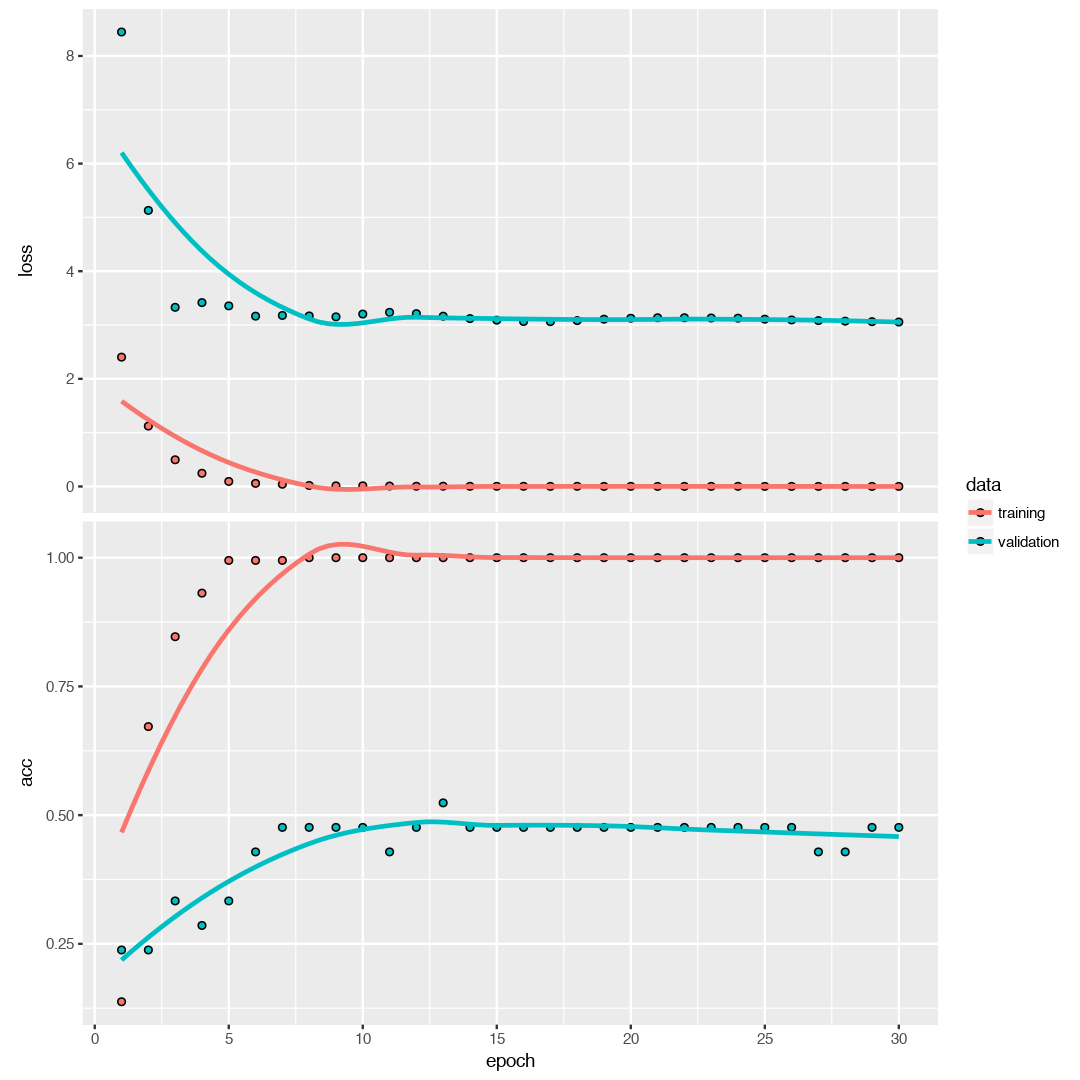

In [34]:
options(repr.plot.width=9,repr.plot.height=9)
plot(mlp_fit)

In [35]:
mlp_fit_df <- as.data.frame(mlp_fit)
mlp_fit_df[31:60,1:4]

,epoch,value,metric,data
31,1,0.2380952,acc,validation
32,2,0.2380952,acc,validation
33,3,0.3333333,acc,validation
34,4,0.2857143,acc,validation
35,5,0.3333333,acc,validation
36,6,0.4285714,acc,validation
37,7,0.4761905,acc,validation
38,8,0.4761905,acc,validation
39,9,0.4761905,acc,validation
40,10,0.4761905,acc,validation


In [40]:
# CNN
cnn_model <- keras_model_sequential()

cnn_model %>%  
  
layer_conv_2d(filter=32,kernel_size=c(5,5),padding="same",
              input_shape=c(128,128,3) ) %>%  
layer_activation("relu") %>%  
  
layer_max_pooling_2d(pool_size=c(2,2)) %>%  
layer_dropout(0.25) %>%

layer_conv_2d(filter=96,kernel_size=c(5,5),padding="same") %>% 
layer_activation("relu") %>%  

layer_max_pooling_2d(pool_size=c(2,2)) %>%  
layer_dropout(0.25) %>%

layer_global_average_pooling_2d() %>%  

layer_dense(512) %>%  
layer_activation("tanh") %>%  
layer_dropout(0.25) %>%  

layer_dense(128) %>%  
layer_activation("tanh") %>%  
layer_dropout(0.25) %>%
  
layer_dense(10) %>%    
layer_activation("softmax") 

In [41]:
cnn_model %>%
  compile(loss="categorical_crossentropy",optimizer="nadam",metrics="accuracy")

In [42]:
summary(cnn_model)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_3 (Conv2D)                   (None, 128, 128, 32)            2432        
________________________________________________________________________________
activation_26 (Activation)          (None, 128, 128, 32)            0           
________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)      (None, 64, 64, 32)              0           
________________________________________________________________________________
dropout_9 (Dropout)                 (None, 64, 64, 32)              0           
________________________________________________________________________________
conv2d_4 (Conv2D)                   (None, 64, 64, 96)              76896       
________________________________________________________________________________
activation_27 (Activation)  

In [43]:
cnn_fit <- cnn_model %>%
  fit(
    x=flower_tensors,
    y=flower_targets,
    shuffle=T,
    batch_size=16,
    validation_split=0.1,
    epochs=30
  )

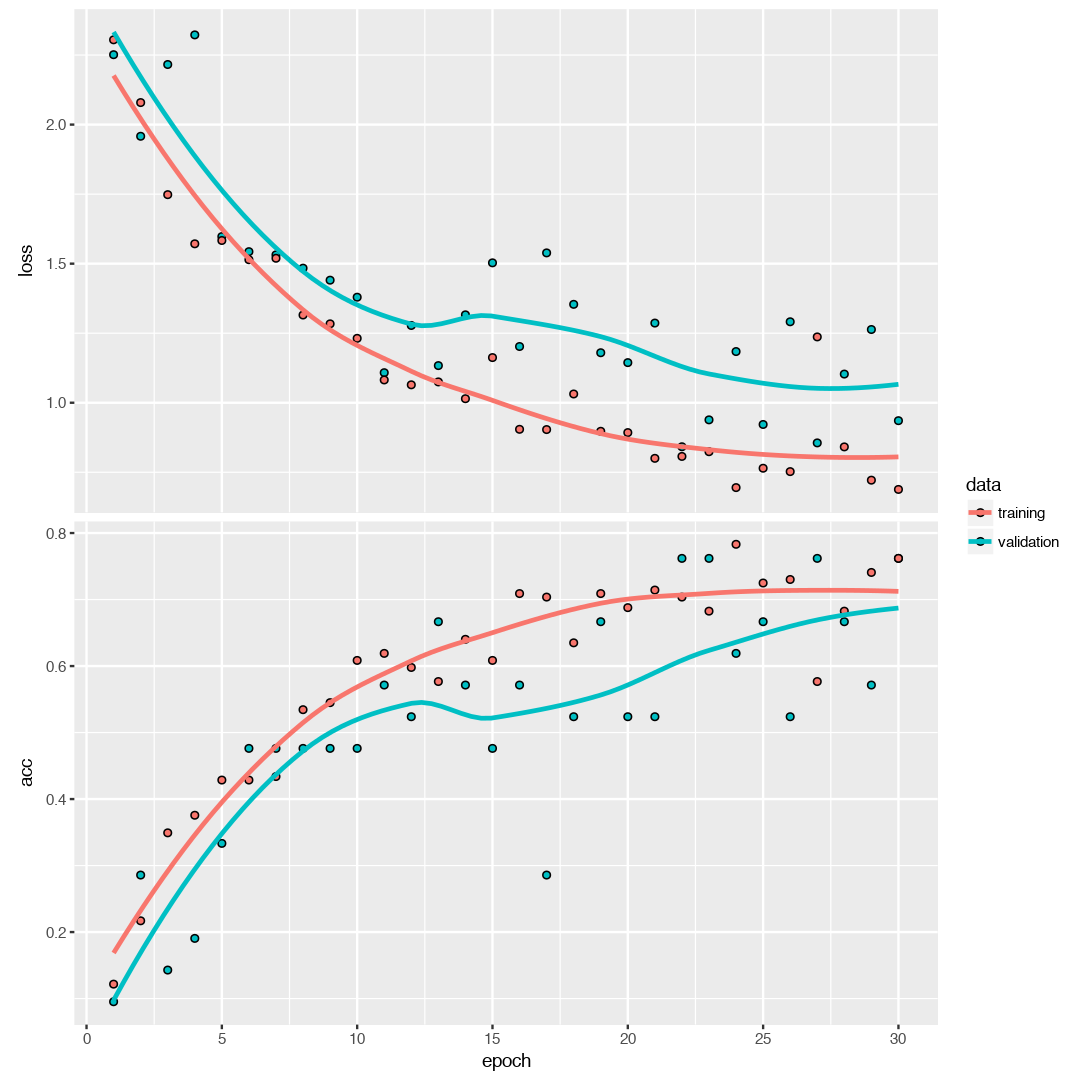

In [45]:
options(repr.plot.width=9,repr.plot.height=9)
plot(cnn_fit)

In [46]:
cnn_fit_df <- as.data.frame(cnn_fit)
cnn_fit_df[31:60,1:4]

,epoch,value,metric,data
31,1,0.0952381,acc,validation
32,2,0.2857143,acc,validation
33,3,0.1428571,acc,validation
34,4,0.1904762,acc,validation
35,5,0.3333333,acc,validation
36,6,0.4761905,acc,validation
37,7,0.4761905,acc,validation
38,8,0.4761905,acc,validation
39,9,0.4761905,acc,validation
40,10,0.4761905,acc,validation


In [70]:
# RNN
rnn_model <- keras_model_sequential()

rnn_model %>%  

layer_lstm(128, return_sequences=T, input_shape=c(1,128*128*3)) %>%  
layer_lstm(128) %>%

layer_dense(512) %>%  
layer_activation("relu") %>%
# layer_dropout(0.2) %>%

layer_dense(10) %>%    
layer_activation("softmax") 

In [71]:
rnn_model %>%
  compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")

In [72]:
summary(rnn_model)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
lstm_22 (LSTM)                      (None, 1, 128)                  25231872    
________________________________________________________________________________
lstm_23 (LSTM)                      (None, 128)                     131584      
________________________________________________________________________________
dense_35 (Dense)                    (None, 512)                     66048       
________________________________________________________________________________
activation_39 (Activation)          (None, 512)                     0           
________________________________________________________________________________
dense_36 (Dense)                    (None, 10)                      5130        
________________________________________________________________________________
activation_40 (Activation)  

In [73]:
rnn_fit <- rnn_model %>%
  fit(
    x=array_reshape(flower_tensors, c(210,1,128*128*3)),
    y=flower_targets,
    shuffle=T,
    batch_size=64,
    validation_split=0.1,
    epochs=30
  )

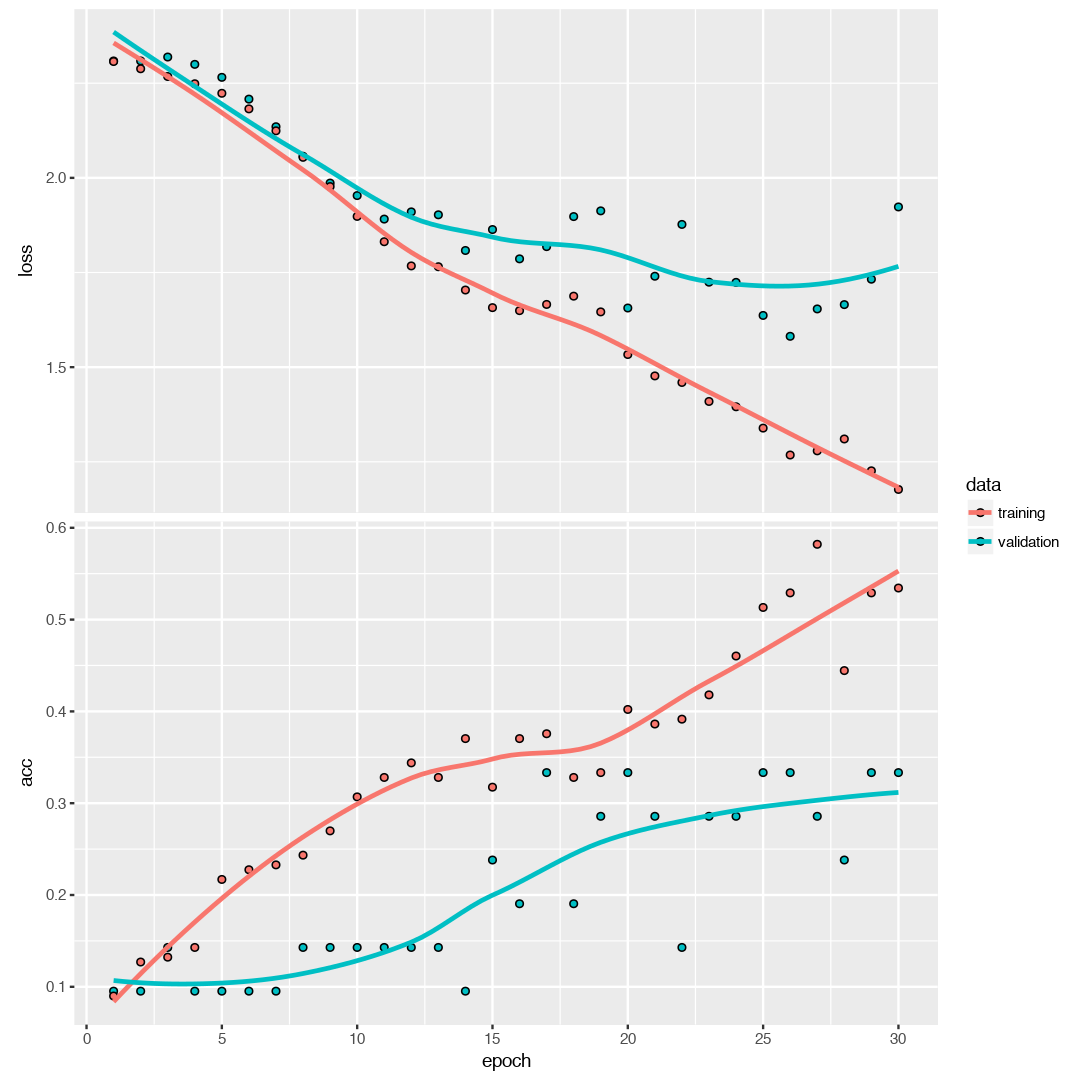

In [74]:
options(repr.plot.width=9,repr.plot.height=9)
plot(rnn_fit)

In [75]:
rnn_fit_df <- as.data.frame(rnn_fit)
rnn_fit_df[31:60,1:4]

,epoch,value,metric,data
31,1,0.0952381,acc,validation
32,2,0.0952381,acc,validation
33,3,0.1428571,acc,validation
34,4,0.0952381,acc,validation
35,5,0.0952381,acc,validation
36,6,0.0952381,acc,validation
37,7,0.0952381,acc,validation
38,8,0.1428571,acc,validation
39,9,0.1428571,acc,validation
40,10,0.1428571,acc,validation
